# **Programming in Python #1**

## **Authors:**
***Rafał Cybula, 242370***\
***Adam Kruszyński, 242440***

**Imports**

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

**Data**

In [2]:
data = pandas.read_csv("data.csv", sep=',',
                       names=["Sex", "Length [mm]", "Diameter [mm]", "Height [mm]", "Whole weight [g]",
                              "Shucked weight [g]", "Viscera weight [g]", "Shell weight [g]", "Rings"])
qualitativeData = data[data.columns[0]]
quantitiveData = pandas.DataFrame(data[data.columns[1:]])

**Functions**

In [3]:
def sex_of(index):
    return qualitativeData[index]


def count_qualitative_occurrences(sex):
    counter = 0
    for i in range(len(qualitativeData)):
        if sex_of(i) == sex:
            counter += 1
    return counter


def qualitative_percentage(sex):
    return round(count_qualitative_occurrences(sex) / len(qualitativeData) * 100, 2)


def isolate_property(column):
    return quantitiveData[quantitiveData.columns[column]]

**Requirements for the maximum grade of 4**

***1.Using the Pandas package, create a table of the distribution of the qualitative variable in the dataset***

In [14]:
def generate_qualitative_dataframe():
    final_data = ((count_qualitative_occurrences('M'), qualitative_percentage('M')),
                  (count_qualitative_occurrences('F'), qualitative_percentage('F')),
                  (count_qualitative_occurrences('I'), qualitative_percentage('I')))
    return pandas.DataFrame(final_data, index=['Male', 'Female', 'Infant'], columns=['count', '%'])


generate_qualitative_dataframe()

,count,%
Male,1528,36.58
Female,1307,31.29
Infant,1342,32.13


***2.Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset***

In [20]:
quantitiveData.describe().transpose().drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Length [mm],0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter [mm],0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height [mm],0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight [g],0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight [g],0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight [g],0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight [g],0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


***3.Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset.***

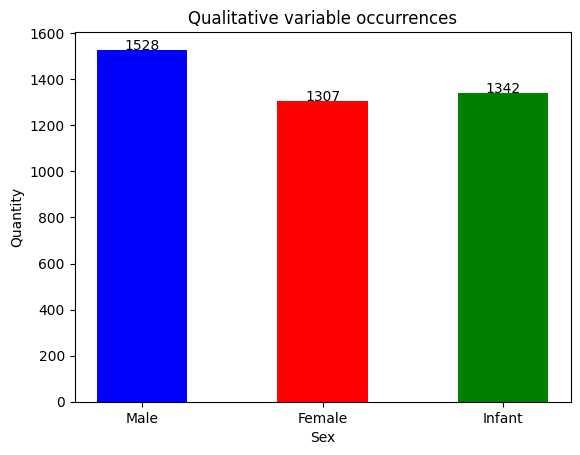

In [26]:
def generate_qualitative_bar_chart(bar_width):
    x = ("Male", "Female", "Infant")
    y = (count_qualitative_occurrences("M"), count_qualitative_occurrences('F'),
         count_qualitative_occurrences('I'))
    plot.bar(x[0], y[0], color="blue", width=bar_width)
    plot.bar(x[1], y[1], color="red", width=bar_width)
    plot.bar(x[2], y[2], color="green", width=bar_width)
    plot.xlabel("Sex")
    plot.ylabel("Quantity")
    plot.title("Qualitative variable occurrences")
    plot.text(x[0], y[0], str(y[0]), ha='center')
    plot.text(x[1], y[1], str(y[1]), ha='center')
    plot.text(x[2], y[2], str(y[2]), ha='center')
    plot.show()


generate_qualitative_bar_chart(0.5)

***4.Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns.***

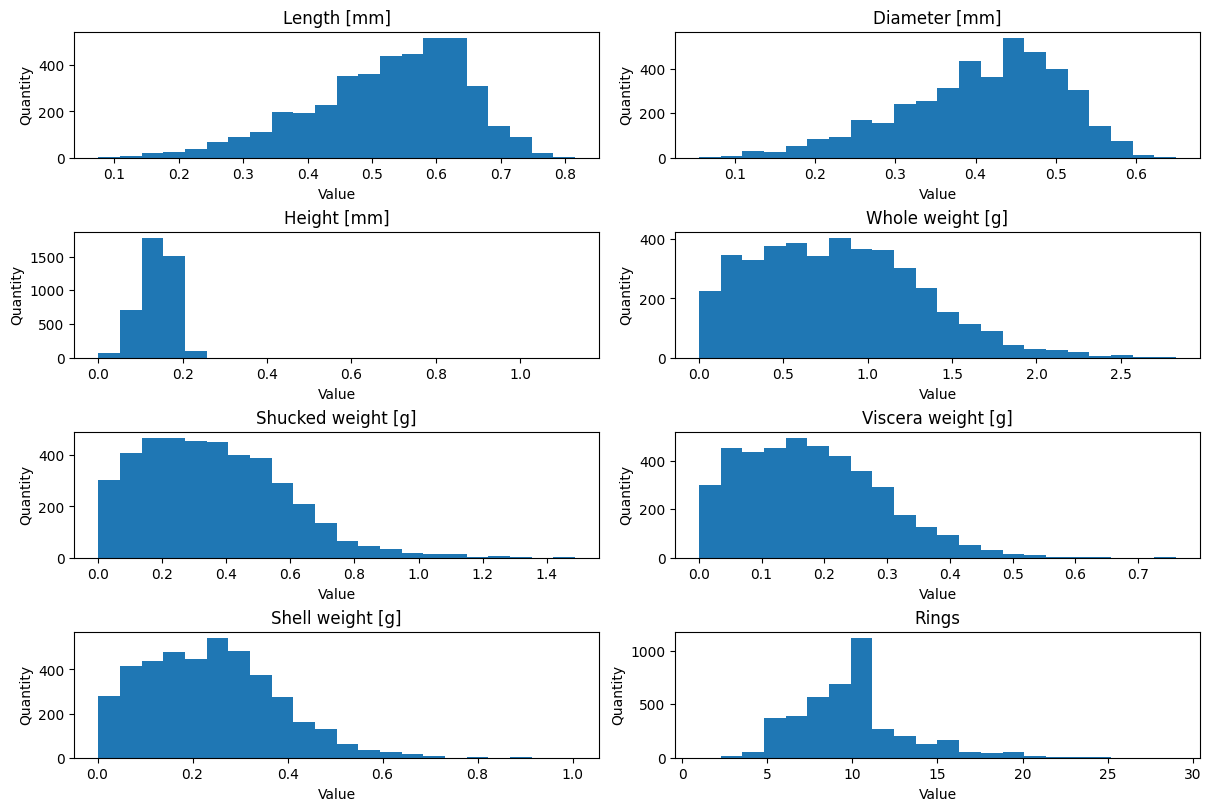

In [33]:
def generate_quantitive_histogram(number_of_bins):
    figure, plot_number = plot.subplots(4, 2, layout='constrained', figsize=(12, 8))

    for row in range(0, 4):
        for col in range(0, 2):
            plot_number[row, col].hist(isolate_property(2 * row + col), bins=number_of_bins)
            title = quantitiveData.columns[2 * row + col]
            plot_number[row, col].set_title(title)
            plot_number[row, col].set(xlabel='Value', ylabel='Quantity')
            
    plot.show()


generate_quantitive_histogram(22)

***5.Using a package chosen among Matplotlib, Pandas, or Seaborn, create a scatter plot for each pair of the quantitative variables in the dataset. All scatter plots should be placed in a single figure spanning 14 rows and 2 columns.***

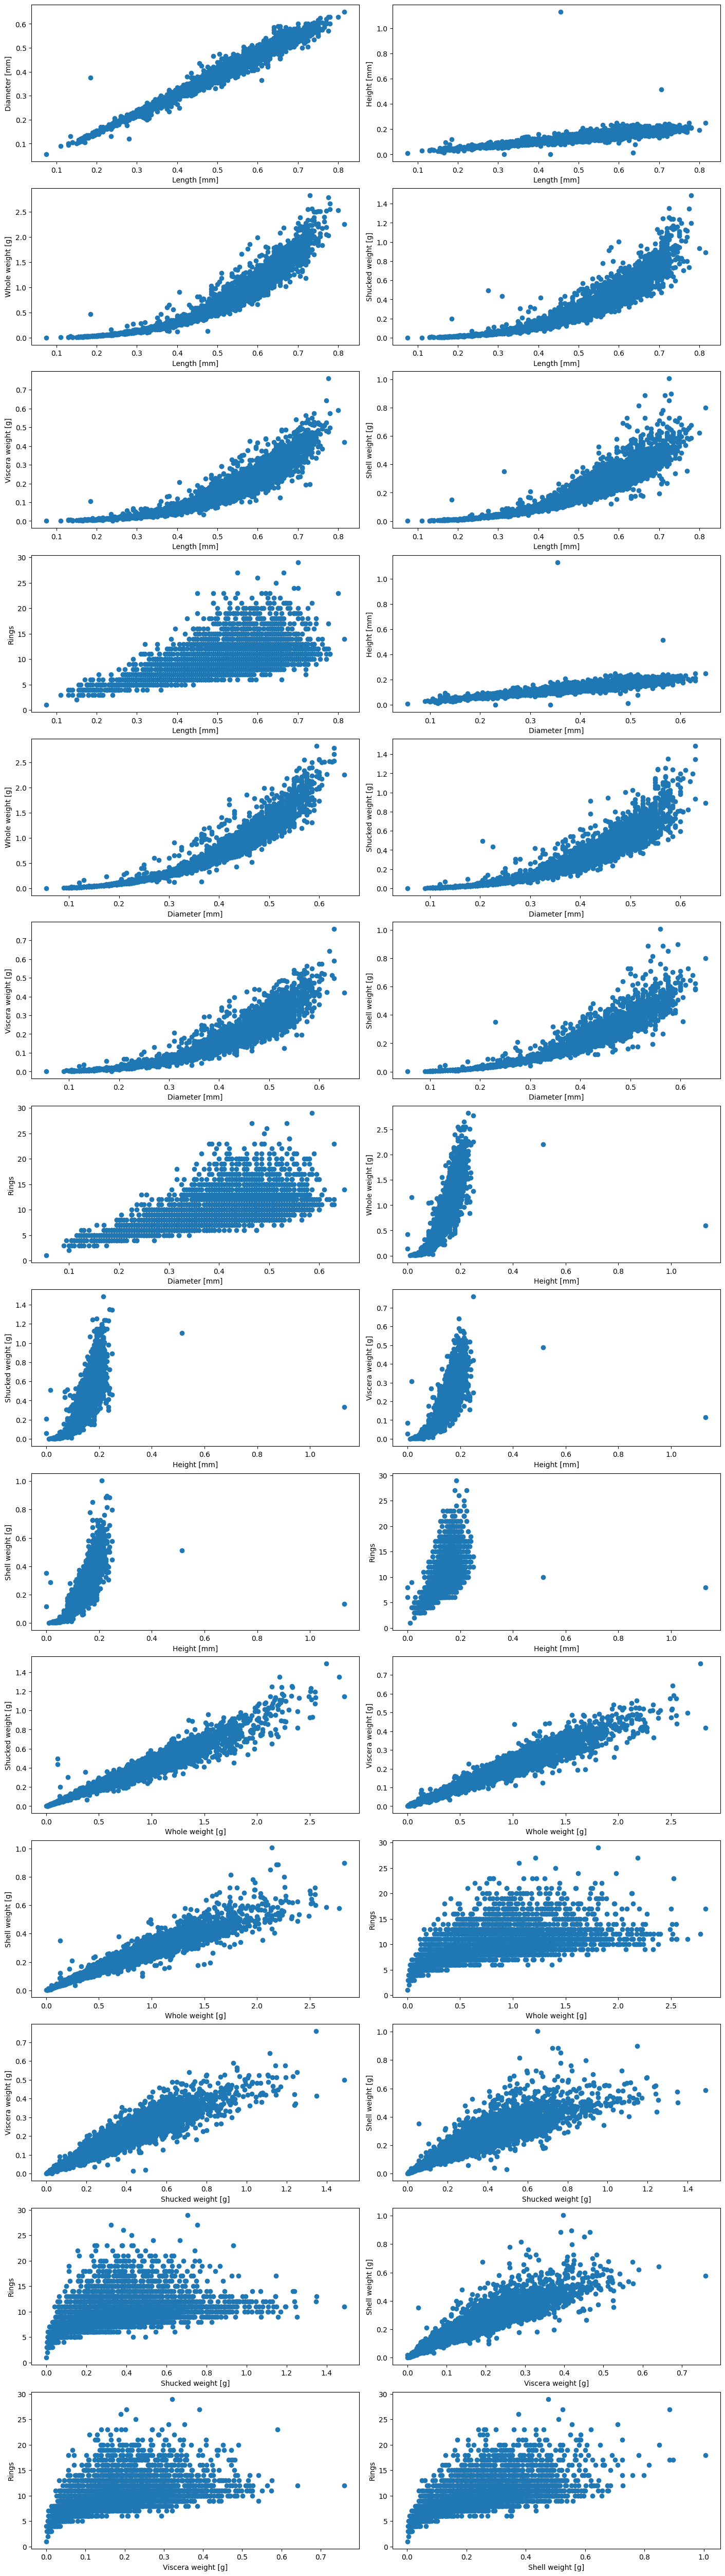

In [36]:
def generate_quantitive_scatter_plot():
    figure, plot_number = plot.subplots(14, 2, figsize=(14, 50), layout='constrained')

    row = 0
    col = 0
    for first_property in range(quantitiveData.shape[1]):
        for second_property in range(first_property + 1, quantitiveData.shape[1]):
            plot_number[row, col].scatter(isolate_property(first_property),
                                          isolate_property(second_property))
            plot_number[row, col].set(xlabel= quantitiveData.columns[first_property],
                                      ylabel= quantitiveData.columns[second_property])
            col = 1 - col
            if col == 0:
                row += 1

    plot.show()


generate_quantitive_scatter_plot()

***6.Using the Pandas package, create a table representing a linear correlation matrix of all quantitative variables in the dataset.***

In [9]:
def generate_correlation_matrix():
    return quantitiveData.corr(method='pearson')


generate_correlation_matrix()

,Length [mm],Diameter [mm],Height [mm],Whole weight [g],Shucked weight [g],Viscera weight [g],Shell weight [g],Rings
Length [mm],1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter [mm],0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height [mm],0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight [g],0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight [g],0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight [g],0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight [g],0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


***7.Using the Seaborn package, create a heatmap representing a linear correlation matrix of all quantitative variables in the dataset.***

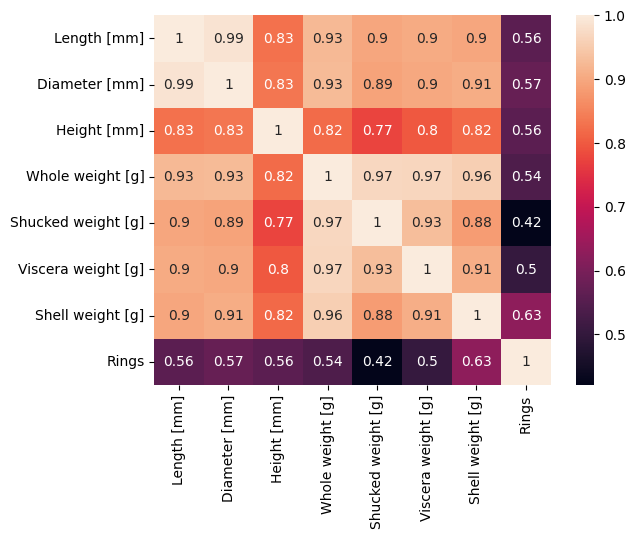

In [38]:
def generate_heatmap():
    correlation_matrix = generate_correlation_matrix()
    sb.heatmap(correlation_matrix, annot=True)
    plot.show()


generate_heatmap()

***8.Using the Seaborn package, create a linear regression plot with the two quantitative variables that are most strongly linearly correlated (the variables may be hardcoded).***

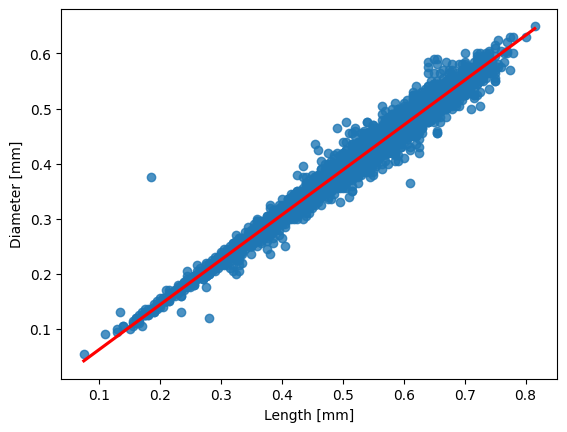

In [37]:
def generate_linear_regression_plot():
    sb.regplot(quantitiveData, x="Length [mm]", y="Diameter [mm]", line_kws={"color": "red"})
    plot.show()


generate_linear_regression_plot()